# МЛ Практика 2: Анализ целевой числойо переменной, базовое моделирование, подбор параметров

### Цель занятия
- Посмотреть как работает ML в действии
- Понять задачу регрессии (предсказывание числовой переменной Y)
- Изучить базовую модель - линейная регрессия
- Понять как подбирать признаки для дальнейшего анализа


### Задачи ML
- регрессия - предсказывание числовой переменной
- классификации - предсказывание категориальной aka номинальной переменной
- ранжирования (кластеризации) - ранжирования признаков без учителя
- снижения размерности - уменьшения количества признаков

In [ ]:
y_regression = [1.35, 0.39, 1.22, 3.39] # только числа
y_classification = ['cat', 'crocodile', 'dog', 'elephan'] # метки классов

**Виды задач**
- с учителем (есть целеая переменная Y) - регрессия, классификация
- без учителя (есть только X) - ранжирование, снижение размерности

In [ ]:
!pip install pandas seaborn scikit-learn

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
#Убираем NaN
print("Было пропусков в Sleep Disorder:", df['Sleep Disorder'].isnull().sum())
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('unknown')
print("Стало пропусков:", df['Sleep Disorder'].isnull().sum())

Было пропусков в Sleep Disorder: 219
Стало пропусков: 0


In [ ]:
df.head(n=3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,unknown
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,unknown
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,unknown


In [ ]:
# сразу обозначаем признаки, которые мы используем
df['Gender'] = df['Gender'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')
df['Blood Pressure'] = df['Blood Pressure'].astype('category')
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')

In [ ]:
'Sleep Duration' in df.columns

True

In [ ]:
# В задачах ML мы должны выделить целевую переменную Y и остальное оставить X
# Y - переменная, которую мы хотим исследовать, предсказать, и так далее
# X - зависимые перменные, влияние которых мы изучаем на Y

y = df['Sleep Duration']
X = df.drop('Sleep Duration', axis=1) if 'Sleep Duration' in df.columns else df

# P.S. принято обозначать Y как целевая переменная, x - зависимая

In [ ]:
X.head(n=3) # первые 3 строки перменной X, удостоверимя что alcohol не существует

,Person ID,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,4200,unknown
1,2,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,unknown
2,3,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,unknown


In [ ]:
y.head(n=3)

,Sleep Duration
0,6.1
1,6.2
2,6.2


### Моделирование (Линейная регрессия)

Линейная регрессия по сути своей в двумерном варианте есть график функций kx + b

In [ ]:
from sklearn.linear_model import LinearRegression # модель линейной регрессии

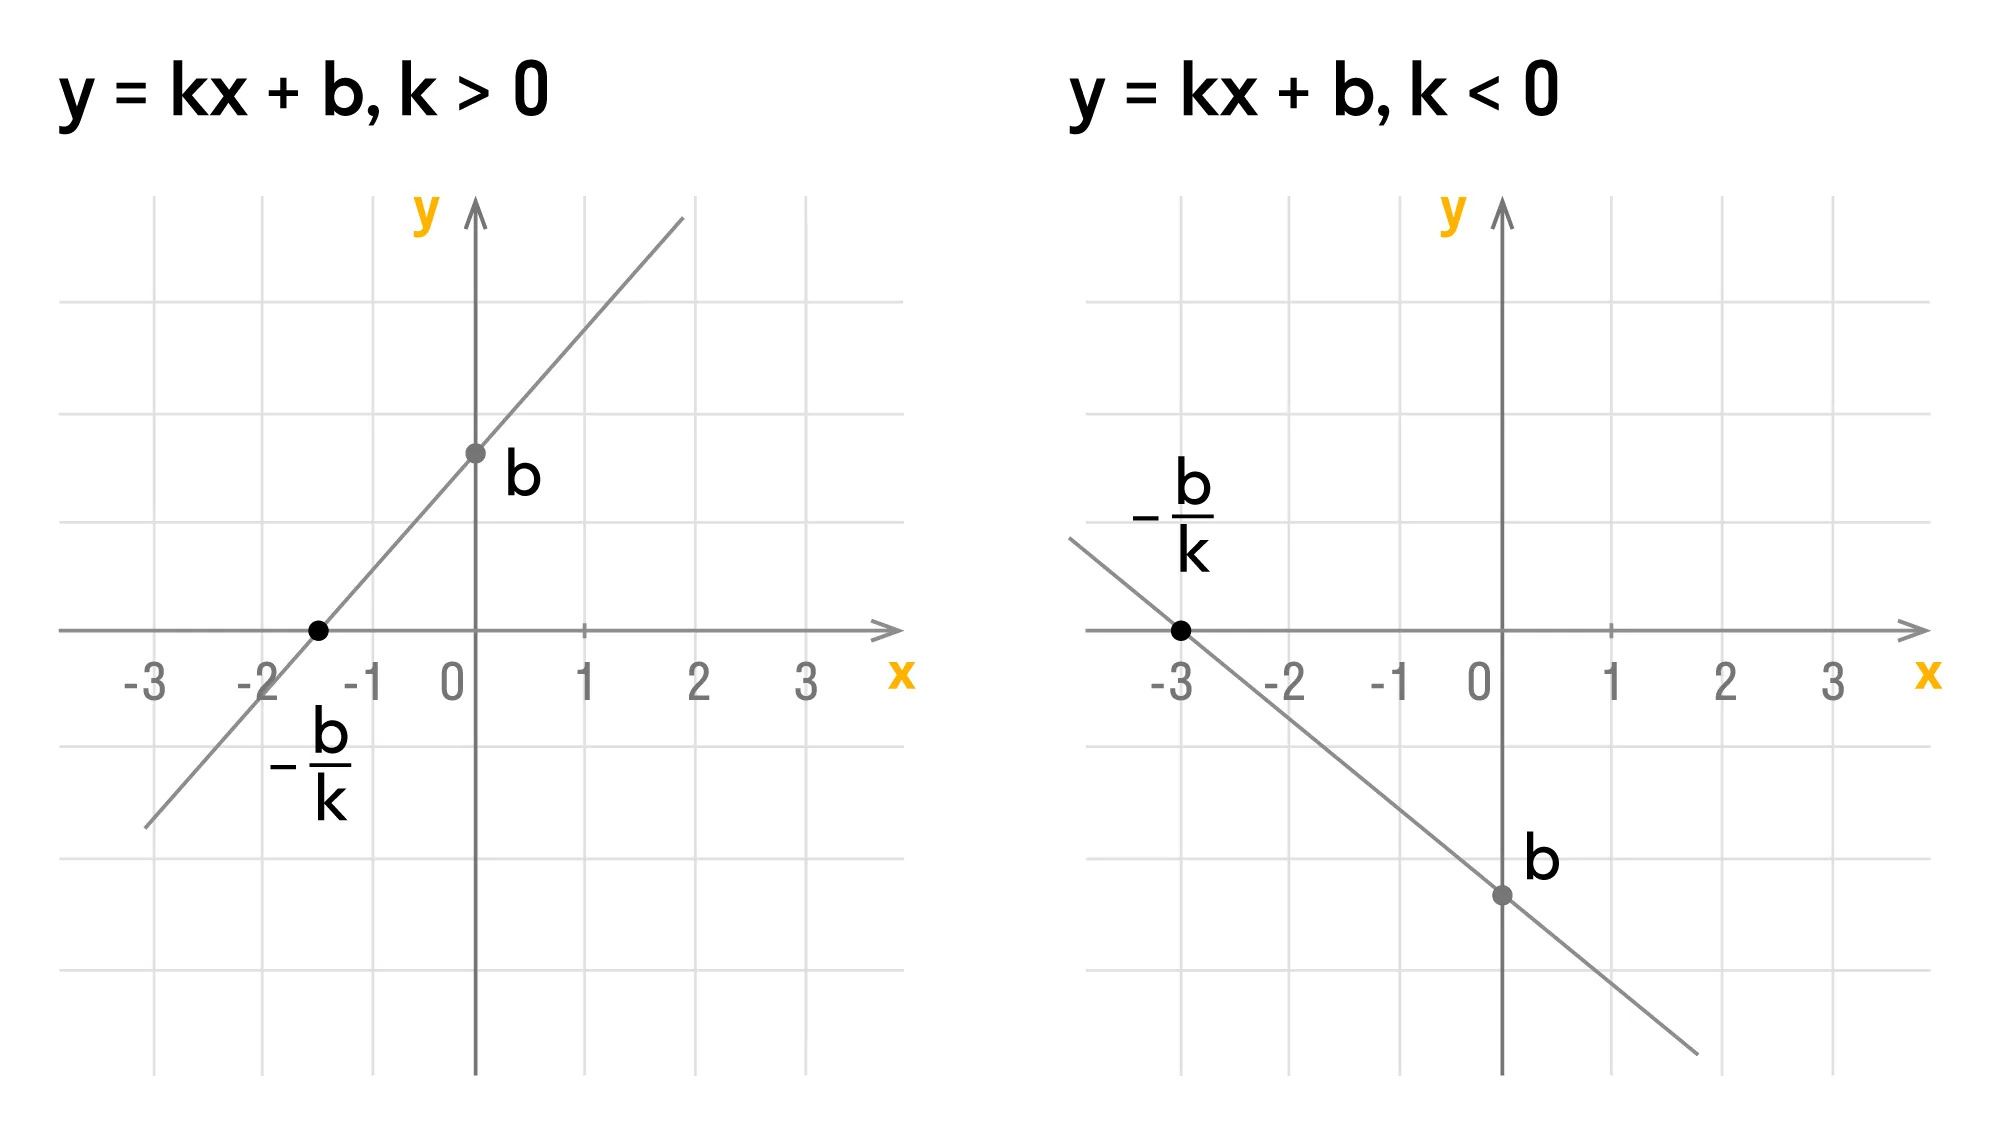

k > 0: 1.201757369505631 b: 1.0750614224818276
k < 0: -0.9903315738916803 b: -0.9607661770653066


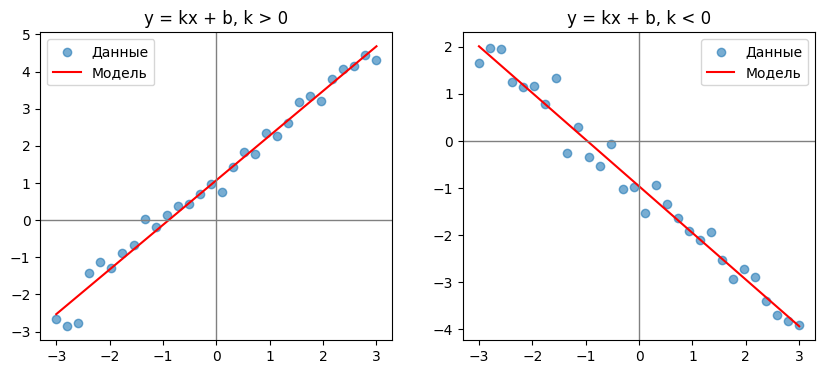

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Синтетические данные для положительного наклона
X_pos = np.linspace(-3, 3, 30).reshape(-1, 1)
y_pos = 1.2 * X_pos.flatten() + 1 + np.random.normal(0, 0.3, size=X_pos.shape[0])

# Синтетические данные для отрицательного наклона
X_neg = np.linspace(-3, 3, 30).reshape(-1, 1)
y_neg = -1.0 * X_neg.flatten() - 1 + np.random.normal(0, 0.3, size=X_neg.shape[0])

# Обучение моделей
model_pos = LinearRegression().fit(X_pos, y_pos)
model_neg = LinearRegression().fit(X_neg, y_neg)

print("k > 0:", model_pos.coef_[0], "b:", model_pos.intercept_)
print("k < 0:", model_neg.coef_[0], "b:", model_neg.intercept_)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# k > 0
axs[0].scatter(X_pos, y_pos, label="Данные", alpha=0.6)
axs[0].plot(X_pos, model_pos.predict(X_pos), color="red", label="Модель")
axs[0].axhline(0, color="gray", linewidth=1)
axs[0].axvline(0, color="gray", linewidth=1)
axs[0].set_title("y = kx + b, k > 0")
axs[0].legend()

# k < 0
axs[1].scatter(X_neg, y_neg, label="Данные", alpha=0.6)
axs[1].plot(X_neg, model_neg.predict(X_neg), color="red", label="Модель")
axs[1].axhline(0, color="gray", linewidth=1)
axs[1].axvline(0, color="gray", linewidth=1)
axs[1].set_title("y = kx + b, k < 0")
axs[1].legend()

plt.show()


#### Базовое обучение модели и борьба с категориальными признаками

⛳
Начнем с того, что модели машинного обучения работает только с числами, векторными матрицами

```
[
  [1,0,1],
  [1,0,2],
  ...
]
```
Вектор -> строка в DataFrame

Матрица -> Весь dataframe

**Модели машинного обучения общаются исключительно на языке чисел и не понимают символьные представления**

In [ ]:
model = LinearRegression(
    fit_intercept=True, # считать свобоный коэфициент B
    copy_X=True, # Глубокое коирование матрицы X, чтробы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)

In [ ]:
model.fit(X, y)

ValueError: could not convert string to float: 'Male'

In [ ]:
X['Sleep Disorder'] # категориальный признак

,Sleep Disorder
0,unknown
1,unknown
2,unknown
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


Существует несколько схем кодирования категориальных признаков

**1. Label Encoding**

```
['выжил', 'умер'] → [1, 0]
```

* Каждое значение = число.
* Используем для **2 категорий** или если есть **порядок**. Либо считаем так -> если bool значение, то LabelEncoder

---

**2. One-Hot Encoding**

| Животное | Слон | Кот | Собака |
| -------- | ---- | --- | ------ |
| Слон     | 1    | 0   | 0      |
| Кот      | 0    | 1   | 0      |
| Собака   | 0    | 0   | 1      |

* Каждая категория → отдельная колонка.
* Используем для **3+ категорий без порядка**.

---
* **2 категории или порядок → LabelEncoder**
* **3+ равноправных категорий → OneHotEncoder**
---
[Подробнее за кодирование категориальных признаков](https://habr.com/ru/articles/456294/)


In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
X = X.drop('Blood Pressure', axis=1)

# Создаем энкодеры
gender_encoder = OneHotEncoder(sparse_output=False)
occupation_encoder = OneHotEncoder(sparse_output=False)
bmi_encoder = OneHotEncoder(sparse_output=False)
sleep_disorder_encoder = OneHotEncoder(sparse_output=False)

# Применяем кодирование
gender_encoded = gender_encoder.fit_transform(X[["Gender"]])
occupation_encoded = occupation_encoder.fit_transform(X[["Occupation"]])
bmi_encoded = bmi_encoder.fit_transform(X[["BMI Category"]])
sleep_disorder_encoded = sleep_disorder_encoder.fit_transform(X[["Sleep Disorder"]])


gender_encoder.categories_
occupation_encoder.categories_
bmi_encoder.categories_
sleep_disorder_encoder.categories_

[array(['Insomnia', 'Sleep Apnea', 'unknown'], dtype=object)]

In [ ]:
gender_encoder.get_feature_names_out()

occupation_encoder.get_feature_names_out()

bmi_encoder.get_feature_names_out()

sleep_disorder_encoder.get_feature_names_out()

array(['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Sleep Disorder_unknown'], dtype=object)

In [ ]:
# превратим обратно в DataFrame с колонками
gender_encoded_df = pd.DataFrame(gender_encoded,
                                columns=gender_encoder.get_feature_names_out(['Gender']))
occupation_encoded_df = pd.DataFrame(occupation_encoded,
                                   columns=occupation_encoder.get_feature_names_out(['Occupation']))
bmi_encoded_df = pd.DataFrame(bmi_encoded,
                             columns=bmi_encoder.get_feature_names_out(['BMI Category']))
sleep_disorder_encoded_df = pd.DataFrame(sleep_disorder_encoded,
                                       columns=sleep_disorder_encoder.get_feature_names_out(['Sleep Disorder']))
df_encoded = pd.concat([
    df.drop(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], axis=1),
    gender_encoded_df,
    occupation_encoded_df,
    bmi_encoded_df,
    sleep_disorder_encoded_df
], axis=1)

df_encoded.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Gender_Female,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unknown
0,1,27,6.1,6,42,6,126/83,77,4200,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,28,6.2,6,60,8,125/80,75,10000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,28,6.2,6,60,8,125/80,75,10000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,28,5.9,4,30,8,140/90,85,3000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,28,5.9,4,30,8,140/90,85,3000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Предсказываем результат

In [ ]:
from sklearn.preprocessing import StandardScaler
# Удаляем исходные категориальные столбцы
X_without_categorical = X.drop(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], axis=1)

# Определяем числовые признаки для масштабирования (включая новые Systolic_BP и Diastolic_BP)
numeric_features = ['Person ID','Age', 'Quality of Sleep', 'Physical Activity Level',
                   'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

# Масштабируем только числовые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without_categorical[numeric_features])
X_numeric_df = pd.DataFrame(X_scaled, columns=numeric_features)  # убираем _scaled из названий для удобства

# Соединяем масштабированные числовые признаки с закодированными категориальными
X_final = pd.concat([X_numeric_df, gender_encoded_df, occupation_encoded_df, bmi_encoded_df, sleep_disorder_encoded_df], axis=1)

X_final.head()

,Person ID,Age,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Gender_Female,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unknown
0,-1.727426,-1.753096,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.718163,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.708901,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.699639,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.690376,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
model.fit(X_final, y) # обучаем модель

LinearRegression()

In [ ]:
y_pred = model.predict(X_final) # предсказываем результат
y_pred

array([6.52214119, 5.9650027 , 5.95913822, 5.90293224, 5.89706776,
       5.24926064, 5.64829344, 7.43997485, 7.43411037, 7.42824588,
       6.4128299 , 7.41651691, 6.40110093, 6.39523644, 6.38937196,
       6.38350748, 6.13911648, 6.3981935 , 6.16511502, 7.47009294,
       7.46422846, 7.45836397, 7.45249949, 7.44663501, 7.44077052,
       7.43490604, 7.42904155, 7.42317707, 7.41731258, 7.4114481 ,
       6.12715062, 6.15901365, 7.27371481, 6.32997614, 7.48261758,
       6.31824717, 6.31238268, 7.46502413, 7.45915964, 7.45329516,
       7.44743067, 7.44156619, 7.4357017 , 7.42983722, 7.42397274,
       7.41810825, 7.41224377, 7.40637928, 7.4005148 , 7.42106531,
       7.91908198, 7.91321749, 6.31904284, 7.47168428, 6.30731387,
       6.30144938, 7.45409083, 6.28972041, 6.28385593, 7.43649737,
       6.27212696, 6.26626247, 6.26039799, 6.25453351, 6.24866902,
       6.24280454, 6.32460433, 6.39570998, 6.47744953, 6.47158505,
       6.31397402, 6.30810954, 6.30224505, 6.29638057, 6.29051

#### Анализ результатов

Интерпретация результатов одна из самых важных частей ML

Попробуем проанализировать "Наивным способом" И "Как стоит"

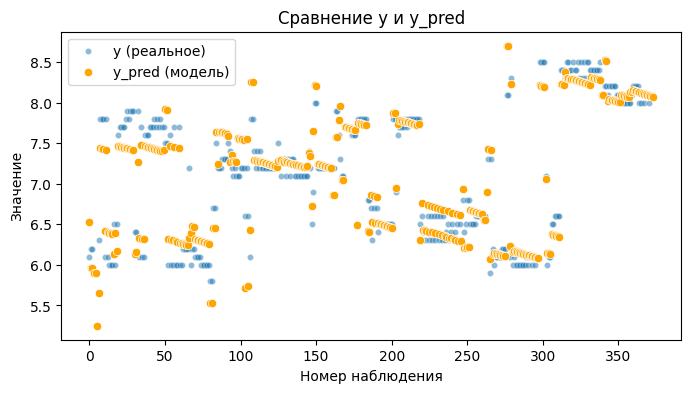

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

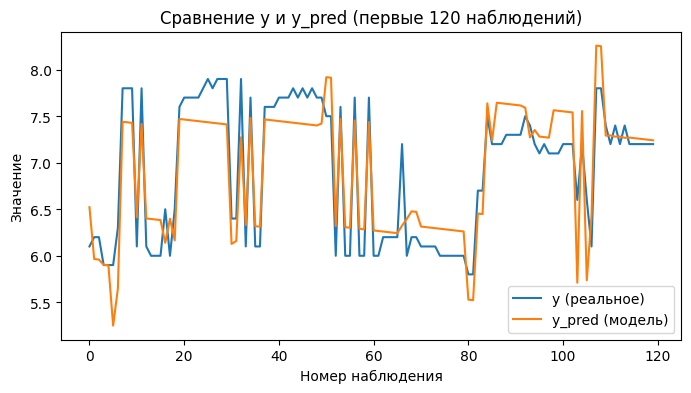

In [ ]:
# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()


#### Метрики качества

Метрики качества - способ оценить разницу между предсказанными значениями и реальными значениями, чтобы оценить, насколько наша модель справляется с задачей

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

In [ ]:
y_pred = model.predict(X_final)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.170
MAPE=0.024, MAPE_as_percent=2.411%
R2=0.917
MSE=0.053
RMSE=0.229


MAE (Средняя абсолютная ошибка)

Мы в среднем ошибаемся на 0.17 единиц. Значение близко к нулю, что свидетельствует о хорошей точности модели.

MAPE (Средняя абсолютная процентная ошибка)

Средняя ошибка составляет 2.411%, что находится в пределах допустимого уровня (<10%). Это указывает на высокую точность предсказаний.

MSE (Средний квадрат ошибки)

Средний квадрат ошибки равен 0.053, что очень близко к нулю. Это подтверждает высокую точность модели.

RMSE (Среднеквадратичная ошибка)

Среднеквадратичная ошибка составляет 0.229. Значение близко к нулю, что свидетельствует о хорошей точности модели. Этот показатель учитывает влияние больших ошибок, делая его более чувствительным к качеству предсказаний.

R² (Коэффициент детерминации)

Коэффициент детерминации равен 0.917, что очень близко к 1. Это означает, что модель предсказывает данные почти идеально.

#### Разберемся с линейной регрессией

Итерация 0: ошибка=51.4980
Итерация 100: ошибка=49.4343
Итерация 200: ошибка=47.4592
Итерация 300: ошибка=45.5680
Итерация 400: ошибка=43.7563
Итерация 500: ошибка=42.0202
Итерация 600: ошибка=40.3560
Итерация 700: ошибка=38.7601
Итерация 800: ошибка=37.2295
Итерация 900: ошибка=35.7611
Итерация 1000: ошибка=34.3522
Итерация 1100: ошибка=33.0001
Итерация 1200: ошибка=31.7023
Итерация 1300: ошибка=30.4566
Итерация 1400: ошибка=29.2606
Итерация 1500: ошибка=28.1123
Итерация 1600: ошибка=27.0097
Итерация 1700: ошибка=25.9509
Итерация 1800: ошибка=24.9341
Итерация 1900: ошибка=23.9576
Итерация 2000: ошибка=23.0197
Итерация 2100: ошибка=22.1188
Итерация 2200: ошибка=21.2535
Итерация 2300: ошибка=20.4224
Итерация 2400: ошибка=19.6240
Итерация 2500: ошибка=18.8571
Итерация 2600: ошибка=18.1204
Итерация 2700: ошибка=17.4126
Итерация 2800: ошибка=16.7328
Итерация 2900: ошибка=16.0796


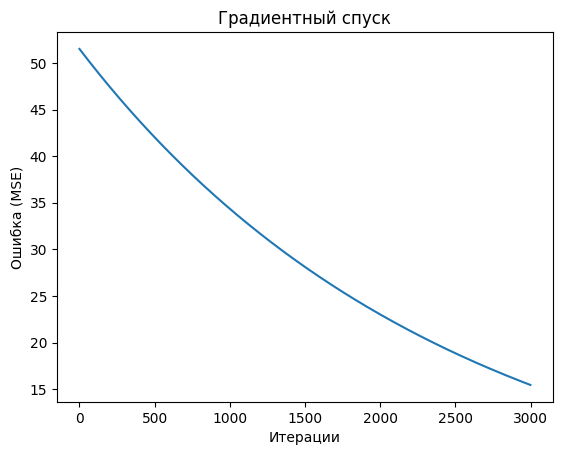

Коэффициенты (свободный член + признаки):
[ 3.21814889e+00  5.78976196e-02  7.23938737e-02  1.83662728e-01
  6.40767135e-02 -1.75431227e-01 -7.71412621e-02 -2.31215934e-02
 -2.50754601e-02 -1.72594464e-02 -1.00354972e-03  1.00354972e-03
 -3.31429189e-02  3.24592369e-03  8.55530101e-02  1.95167514e-02
 -4.09866914e-03 -5.02077847e-03 -9.86596613e-03 -3.08454261e-02
 -2.14717420e-02 -2.81451217e-03 -5.11857872e-02  4.53948742e-02
  1.81687872e-02  2.40677872e-02 -6.28660789e-02 -5.24115995e-02
  4.25862440e-03  3.95071133e-02]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def make_linear_regression(X, y, learning_rate=0.001, n_iter=1000):
    # переводим X и y в numpy
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)

    # добавим столбец 1 для свободного члена (bias)
    X_with_bias = np.c_[np.ones(X.shape[0]), X]

    n_samples, n_features = X_with_bias.shape

    # инициализация весов
    w = np.zeros(n_features)

    # история ошибок для визуализации
    losses = []

    for i in range(n_iter):
        y_pred = X_with_bias.dot(w)
        error = y_pred - y

        # MSE
        loss = (error ** 2).mean()
        losses.append(loss)

        # шаг градиентного спуска
        grad = (2 / n_samples) * X_with_bias.T.dot(error)
        w -= learning_rate * grad

        if i % 100 == 0:
            print(f"Итерация {i}: ошибка={loss:.4f}")

    return w, losses

# Подготовка данных
X_final = X_final.astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Запуск регрессии
w, losses = make_linear_regression(X_scaled, y, learning_rate=0.0001, n_iter=3000)

plt.plot(losses)
plt.xlabel("Итерации")
plt.ylabel("Ошибка (MSE)")
plt.title("Градиентный спуск")
plt.show()

print("Коэффициенты (свободный член + признаки):")
print(w)

#### Разбираемся с признаками (EDA) - предварительный анализ данных

In [ ]:
df.head(n=3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,unknown
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,unknown
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,unknown


In [ ]:
# целевая переменная
y_eda = df["Sleep Duration"]

# признаки (убираем Sleep Duration)
X_eda = df.drop(columns=["Sleep Duration"])


In [ ]:
# P.S. в своем df я предварительно сделал .astype(cateogyr), вам нужно здесь сделать тоже самое
df['Gender'] = df['Gender'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')
df['Blood Pressure'] = df['Blood Pressure'].astype('category')
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')
X_eda.describe(include='all')

,Person ID,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,NaN,2,NaN,11,NaN,NaN,NaN,4,25,NaN,NaN,3
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,Normal,130/85,NaN,NaN,unknown
freq,NaN,189,NaN,73,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,187.500000,NaN,42.184492,NaN,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


**Пояснения**


Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64


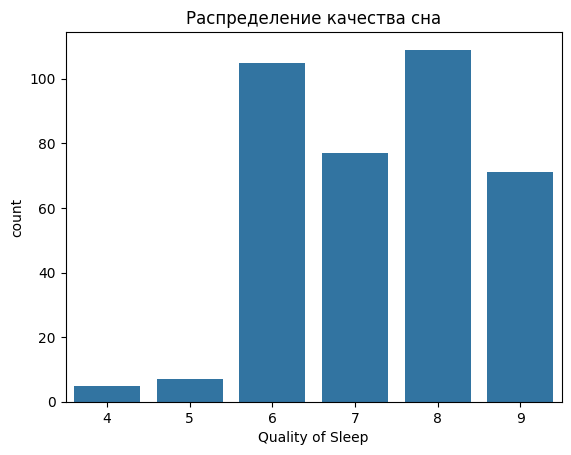

                  count      mean       std  min   25%  50%   75%  max
Quality of Sleep                                                      
4                   5.0  5.860000  0.054772  5.8  5.80  5.9  5.90  5.9
5                   7.0  6.500000  0.081650  6.4  6.45  6.5  6.55  6.6
6                 105.0  6.195238  0.204930  5.9  6.00  6.1  6.30  6.9
7                  77.0  7.140260  0.545860  6.5  6.60  7.1  7.70  7.9
8                 109.0  7.403670  0.271118  7.1  7.20  7.3  7.70  7.9
9                  71.0  8.243662  0.181842  8.0  8.10  8.2  8.40  8.5


In [ ]:
print(df["Quality of Sleep"].value_counts())
sns.countplot(data=df, x="Quality of Sleep")
plt.title("Распределение качества сна")
plt.show()

print(df.groupby("Quality of Sleep")["Sleep Duration"].describe())


Пояснения по распределению качества сна:

Больше всего людей с оценкой сна 6 и 8 (105 и 109 наблюдений соответственно).
Оценка 7 тоже распространена - 77 наблюдений.
Крайние оценки редкие: качество 4 всего 5 человек, а 9 - 71 человек.
То есть датасет в основном содержит людей со средним и хорошим качеством сна.

По другим признакам в зависимости от качества сна:

*При низком качестве сна (4-5):*

Вероятно, выше уровень стресса

Меньшая продолжительность сна

Ниже физическая активность

*При среднем качестве сна (6-7):*

Умеренные показатели по всем параметрам

Наиболее типичная группа в датасете

*При высоком качестве сна (8-9):*

Ниже уровень стресса

Выше физическая активность

Оптимальная продолжительность сна

Нормальные показатели давления и пульса

Вывод:
Качество сна тесно связано с комплексом факторов: стрессом, физической активностью, продолжительностью сна и физиологическими показателями. Модель будет лучше предсказывать средние значения (6-8), так как они наиболее представлены в данных.


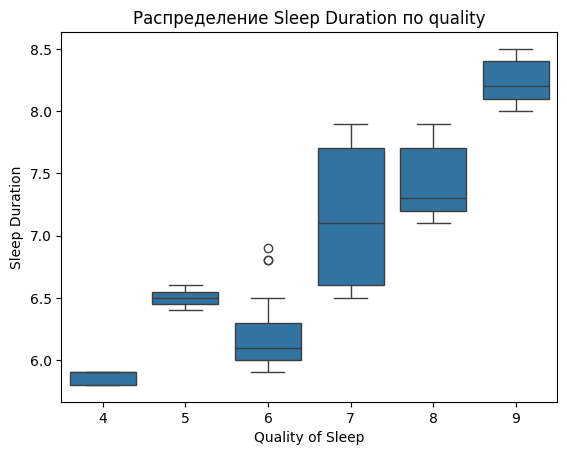

In [ ]:
sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Duration")
plt.title("Распределение Sleep Duration по quality")
plt.show()

**Пояснения:**

При малой продолжительности сна - качество сна намного ухудшается. Самый качественный же сон по медиане мы видим у 9 часов. Мы видим немного выбросов у 6 часов

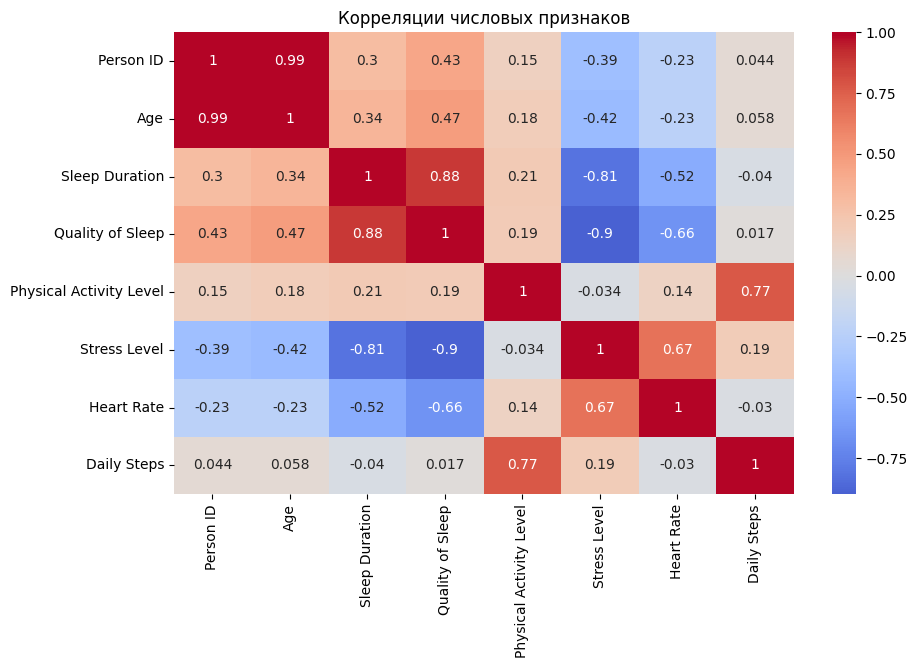

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()


 Сильные корреляции (> 0.7)
1. Person ID и Age: 0.99

Почти идеальная корреляция - это артефакт данных

Скорее всего, люди в датасете упорядочены по возрасту

Вывод: Можно удалить Person ID, так как он дублирует возраст

2. Quality of Sleep и Sleep Duration: 0.88

Очень сильная положительная связь

Чем дольше спит человек, тем выше качество его сна

Логично: продолжительность сна напрямую влияет на его качество

3. Quality of Sleep и Stress Level: -0.9

Очень сильная отрицательная связь

Чем выше стресс, тем хуже качество сна

Важно: стресс - ключевой фактор нарушения сна

4. Sleep Duration и Stress Level: -0.81

Сильная отрицательная связь

Чем выше стресс, тем меньше продолжительность сна

Объяснение: стресс мешает засыпанию и вызывает бессонницу

Средние корреляции (0.5 - 0.7)
5. Quality of Sleep и Heart Rate: -0.66

Умеренная отрицательная связь

Чем выше пульс, тем хуже качество сна

Объяснение: повышенный пульс может быть признаком стресса или проблем со здоровьем

6. Stress Level и Heart Rate: 0.67

Умеренная положительная связь

Чем выше стресс, тем выше пульс

Физиология: стресс вызывает учащенное сердцебиение

7. Physical Activity Level и Daily Steps: 0.77

Сильная положительная связь

Чем больше физическая активность, тем больше шагов

Ожидаемо: эти показатели измеряют одно и то же

 Слабые корреляции (< 0.5)
8. Age и Quality of Sleep: 0.47

Слабая положительная связь

Чем старше человек, тем немного лучше сон

Неожиданно: обычно с возрастом сон ухудшается

9. Age и Sleep Duration: 0.34

Очень слабая связь

Минимальное влияние возраста на продолжительность сна

Ключевые выводы для модели:
Главные факторы качества сна: стресс (-0.9) и продолжительность сна (0.88)

Person ID можно удалить из-за мультиколлинеарности с возрастом

Stress Level и Heart Rate сильно связаны - возможно выбрать один из них

Physical Activity Level и Daily Steps дублируют друг друга

/tmp/ipython-input-1299636813.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


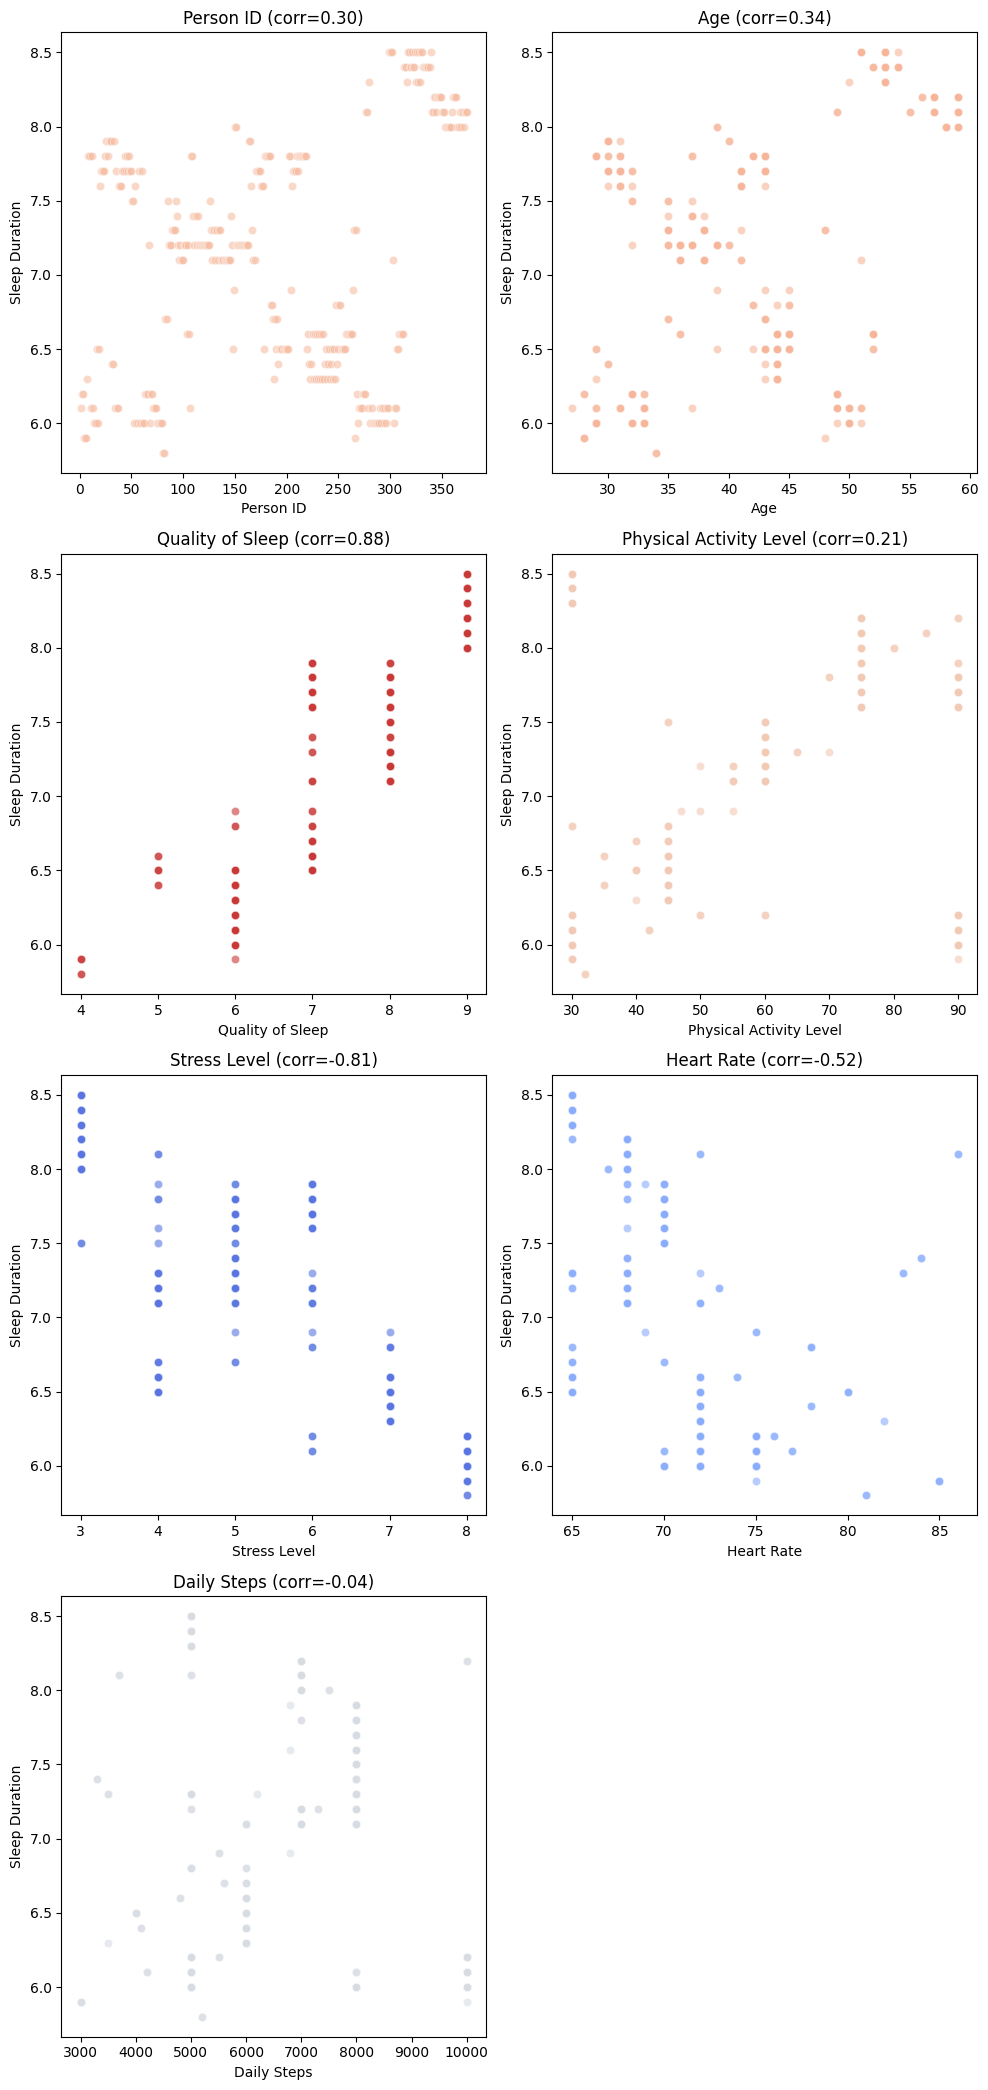

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X_eda.select_dtypes(include="number").columns
n = len(num_features)

# корреляции с alcohol
corrs = df[num_features].corrwith(df["Sleep Duration"])

# палитра (от синего до красного)
cmap = plt.cm.get_cmap("coolwarm")

# сетка графиков (2 в строку)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим [-1,1] → [0,1]

    sns.scatterplot(ax=axes[i], data=df, x=col, y="Sleep Duration", color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

# удаляем пустые ячейки
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Разделение на тестовую и обучающую

Разделение на тестовую и обучающую выборки неободимо для того, чтобы разделить выборку на несколько выборок, данные на которых обучаем и данные на которых тестируем результат.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(299, 75, 299, 75)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

Оценка на выборке на которой обучали необходима для того, чтобы понять насколько наша модель пере/недообучена

In [ ]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

метрики для выборки на которых обучалась модель
MAE 0.166
MAPE=0.023, MAPE_as_percent=2.346%
R2=0.916
MSE=0.052
RMSE=0.228


MAE: 0.166
Средняя ошибка = 0.166 балла

Если модель предсказывает "качество сна 7", то в среднем ошибается на ±0.17 балла

MAPE: 2.346%
Средняя ошибка = 2.3%

Очень точная модель! Ошибка всего 2.3% от реальных значений

R²: 0.916
Модель объясняет 91.6% изменений в данных

Отличный результат! (максимум 1.0)

MSE: 0.052 и RMSE: 0.228
Квадратичные ошибки - тоже показывают высокую точность

Оценка на выборке, которую модель никогда не видела, дает объективные представления о том, насколько влияют данные

In [ ]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 0.195
MAPE=0.028, MAPE_as_percent=2.838%
R2=0.899
MSE=0.068
RMSE=0.260


In [ ]:
model.coef_

array([-0.59077153,  0.84383848,  0.32685993,  0.19335268, -0.2845849 ,
        0.16519483, -0.19440995, -0.81053531,  0.77337354,  0.0018449 ,
       -0.0018449 , -0.1353673 ,  0.12062301,  0.09971039,  0.0513742 ,
       -0.00956737, -0.16589223,  0.07827347,  0.04458959, -0.01289987,
       -0.00788298, -0.03570527,  0.10539283,  0.05479371, -0.1290412 ,
       -0.09089019,  0.01959261, -0.00756446, -0.009843  ])

In [ ]:
print(f"Количество коэффициентов модели: {len(model.coef_)}")
print(f"Количество признаков в X: {len(X.columns)}")
print(f"Названия признаков: {list(X.columns)}")

Количество коэффициентов модели: 29
Количество признаков в X: 13
Названия признаков: ['Person ID', 'Gender', 'Age', 'Occupation', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP']


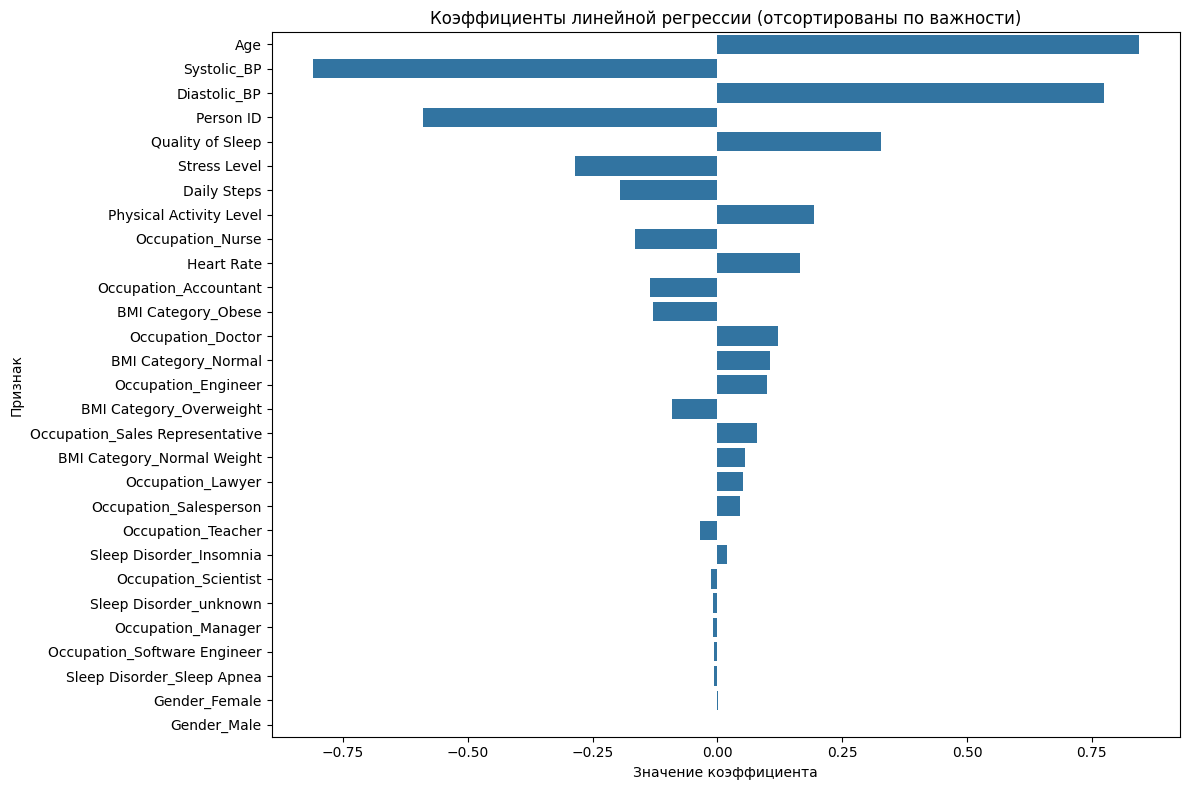

In [ ]:
# Группировка коэффициентов по исходным признакам
plt.figure(figsize=(12, 8))
feature_names = X_final.columns
# Сортируем все коэффициенты
sorted_idx = np.argsort(np.abs(model.coef_))[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_coefs = [model.coef_[i] for i in sorted_idx]

sns.barplot(x=sorted_coefs, y=sorted_features)
plt.xlabel("Значение коэффициента")
plt.ylabel("Признак")
plt.title("Коэффициенты линейной регрессии (отсортированы по важности)")
plt.tight_layout()
plt.show()